# Cyrus Tung

## Research question/interests
 **Did covid-19 lead to grade inflation in selected courses?**

Spread of Covid-19 leads to change of course format from inperson clasess to zoom or hybrid classes. In this project, I will be investigating did the change of course format brings grade inflation. I am intereseted in the difference of grade distribution of students studying under different courrse format. This research wil be focusing on courses from three different discipline, Economics, Politics and Philosophy. Upon completion of my project, I aspire on discovering insights on how Covid-19 impacts the grade distribution. 



In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from my_code2 import project_function2

file_path = ('../data/raw/rawdata.csv')

df = project_function2.load_and_process(file_path, ['Professor', 'Title', 'Detail'])
df

Year Campus Subject Course   Avg             <50
                                   mean median <lambda>
0    2018.0   UBCO    ECON  101.0  66.0   66.0     44.0
1    2018.0   UBCO    ECON  102.0  66.0   66.0     32.0
2    2018.0   UBCO    ECON  204.0  65.0   65.0     14.0
3    2018.0   UBCO    ECON  205.0  58.0   58.0     21.0
4    2018.0   UBCO    ECON  221.0  71.0   71.0      5.0
..      ...    ...     ...    ...   ...    ...      ...
954  2021.0   UBCV    POLI  449.0  80.0   80.0      0.0
955  2021.0   UBCV    POLI  460.0  85.0   85.0      0.0
956  2021.0   UBCV    POLI  462.0  80.0   80.0      1.0
957  2021.0   UBCV    POLI  464.0  84.0   85.0      0.0
958  2021.0   UBCV    POLI  492.0  86.0   86.0      0.0

[959 rows x 7 columns]

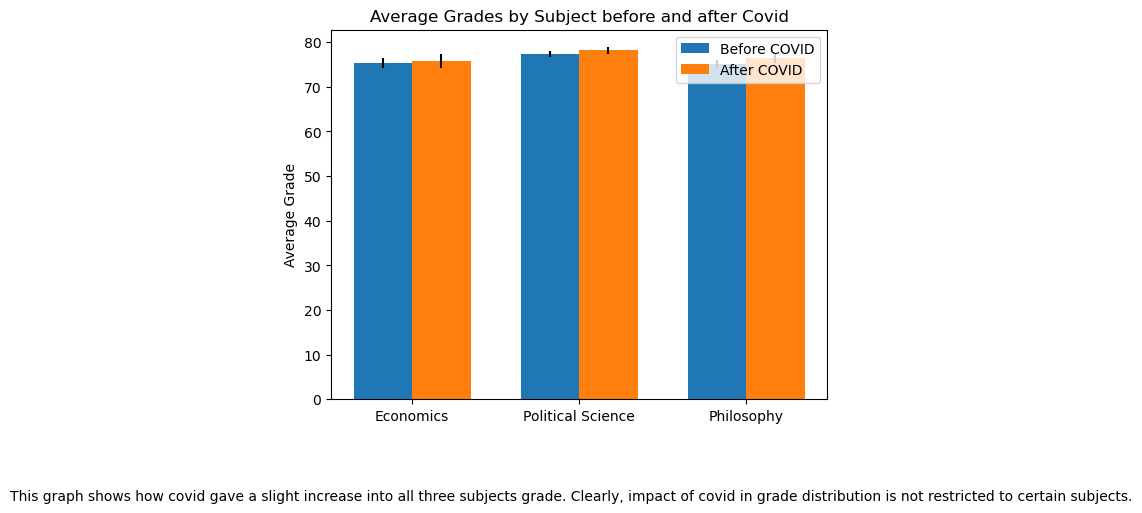

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the CSV data
df = pd.read_csv('../data/raw/rawdata.csv')

# Convert the 'Year' column to datetime format
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Calculate the average grade for each subject by year
df_econ = df[df['Subject'] == 'ECON'].groupby(df['Year'].dt.year)['Avg'].mean().reset_index()
df_poli = df[df['Subject'] == 'POLI'].groupby(df['Year'].dt.year)['Avg'].mean().reset_index()
df_phil = df[df['Subject'] == 'PHIL'].groupby(df['Year'].dt.year)['Avg'].mean().reset_index()

# Calculate the average grade for each subject before and after COVID
df_econ_pre = df_econ[df_econ['Year'] < 2020]['Avg']
df_econ_post = df_econ[df_econ['Year'] >= 2020]['Avg']
df_poli_pre = df_poli[df_poli['Year'] < 2020]['Avg']
df_poli_post = df_poli[df_poli['Year'] >= 2020]['Avg']
df_phil_pre = df_phil[df_phil['Year'] < 2020]['Avg']
df_phil_post = df_phil[df_phil['Year'] >= 2020]['Avg']

# Create a bar chart comparing the average grades for each subject before and after COVID
labels = ['Economics', 'Political Science', 'Philosophy']
pre_covid_means = [df_econ_pre.mean(), df_poli_pre.mean(), df_phil_pre.mean()]
post_covid_means = [df_econ_post.mean(), df_poli_post.mean(), df_phil_post.mean()]
pre_covid_stds = [np.std(df_econ_pre), np.std(df_poli_pre), np.std(df_phil_pre)]
post_covid_stds = [np.std(df_econ_post), np.std(df_poli_post), np.std(df_phil_post)]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, pre_covid_means, width, yerr=pre_covid_stds, label='Before COVID')
rects2 = ax.bar(x + width/2, post_covid_means, width, yerr=post_covid_stds, label='After COVID')

ax.set_ylabel('Average Grade')
ax.set_title('Average Grades by Subject before and after Covid')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Add a description under the plot
plt.figtext(0.5, -0.1, "This graph shows how covid gave a slight increase into all three subjects grade. Clearly, impact of covid in grade distribution is not restricted to certain subjects.",
                ha="center", fontsize=10)
plt.show()


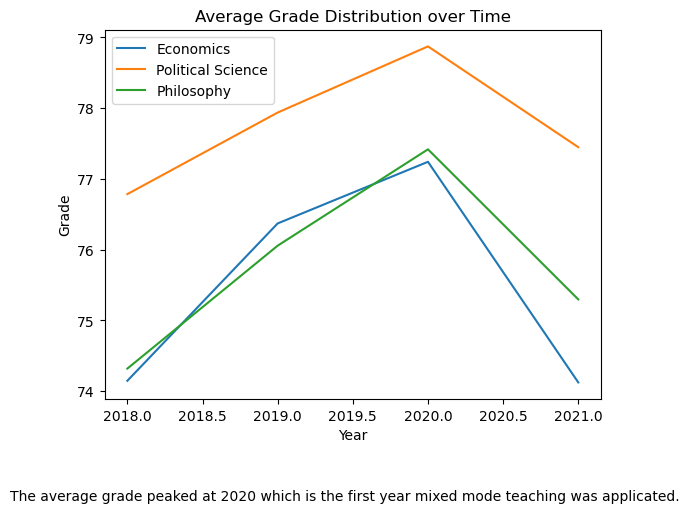

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# Convert the 'Year' column to datetime format
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Calculate the average grade for each subject by year
df_econ = df[df['Subject'] == 'ECON'].groupby(df['Year'].dt.year)['Avg'].mean().reset_index()
df_poli = df[df['Subject'] == 'POLI'].groupby(df['Year'].dt.year)['Avg'].mean().reset_index()
df_phil = df[df['Subject'] == 'PHIL'].groupby(df['Year'].dt.year)['Avg'].mean().reset_index()



# Plot a line chart of the average grade distribution over time for each subject
plt.plot(df_econ['Year'], df_econ['Avg'], label='Economics')
plt.plot(df_poli['Year'], df_poli['Avg'], label='Political Science')
plt.plot(df_phil['Year'], df_phil['Avg'], label='Philosophy')
plt.title('Average Grade Distribution over Time')
plt.xlabel('Year')
plt.ylabel('Grade')
plt.legend()
# Add a description under the plot
plt.figtext(0.5, -0.1, "The average grade peaked at 2020 which is the first year mixed mode teaching was applicated.",
                ha="center", fontsize=10)
plt.show()

# Calculate the mean and standard deviation of the grade data for each subject
econ_mean = df_econ['Avg'].mean()
econ_std = np.std(df_econ['Avg'])
poli_mean = df_poli['Avg'].mean()
poli_std = np.std(df_poli['Avg'])
phil_mean = df_phil['Avg'].mean()
phil_std = np.std(df_phil['Avg'])


# Calculate the correlation between grade and year for each subject
econ_corr = df_econ['Year'].corr(df_econ['Avg'])
poli_corr = df_poli['Year'].corr(df_poli['Avg'])
phil_corr = df_phil['Year'].corr(df_phil['Avg'])



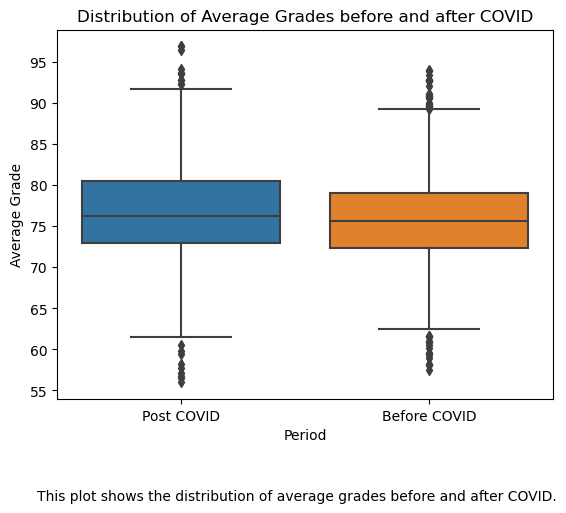

In [52]:

# Convert the 'Year' column to datetime format
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Create a box plot of the average grades before and after COVID
sns.boxplot(x=df['Year'].apply(lambda x: 'Before COVID' if x.year < 2020 else 'Post COVID'), y='Avg', data=df)
plt.title('Distribution of Average Grades before and after COVID')
plt.xlabel('Period')
plt.ylabel('Average Grade')

# Add a description under the plot
plt.figtext(0.5, -0.1, "This plot shows the distribution of average grades before and after COVID.",
                ha="center", fontsize=10)
plt.show()
